# Feature Importance and Tuning

In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns


## Feature Importance

Identify the most relevant features to improve the model's performance

In [ ]:
# Read data
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test_scaled = pd.read_csv('X_test_scaled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

sample_size = 50000

# Sample data
X_train_scaled = X_train_scaled.sample(n=sample_size, random_state=1)
X_train = X_train.sample(n=sample_size, random_state=1)
y_train = y_train.sample(n=sample_size, random_state=1)

X_test_scaled = X_test_scaled.sample(n=sample_size, random_state=1)
X_test = X_test.sample(n=sample_size, random_state=1)
y_test = y_test.sample(n=sample_size, random_state=1)

print('Data loaded')
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test_scaled shape:', X_test_scaled.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

y_train = y_train.values.ravel()


In [51]:
def grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    
    print(grid_search.best_params_)
    print(grid_search.best_score_)

### Random Forest

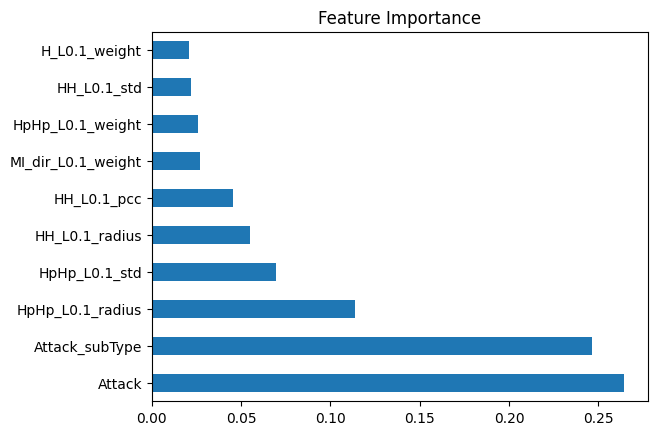

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
1.0


In [52]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh', title='Feature Importance')
plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

grid_search(rf, param_grid)


## Model Training

In [53]:
def printMetrics(model):
    print('Accuracy:', cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean())
    print('Precision:', cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='precision').mean())
    print('Recall:', cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall').mean())
    print('F1:', cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1').mean())
    print('ROC AUC:', cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc').mean())

### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred)

print('Logistic Regression')
print('Accuracy: ', log_reg_accuracy)
print('Precision: ', log_reg_precision)
print('Recall: ', log_reg_recall)
print('F1 Score: ', log_reg_f1)
print('ROC AUC: ', log_reg_roc_auc)

filename = 'log_reg.sav'
pickle.dump(log_reg, open(filename, 'wb'))

Logistic Regression
Accuracy:  0.9999
Precision:  0.9987373737373737
Recall:  1.0
F1 Score:  0.9993682880606444
ROC AUC:  0.9999457052883048


### Gradient Boosting

In [55]:
#XGBoost
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

print(cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='accuracy').mean())

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

grid_search(gb, param_grid)

filename = 'gb_model.sav'
pickle.dump(gb, open(filename, 'wb'))

1.0
Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
1.0


### SVM

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

print(cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='accuracy').mean())

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid'],
}

grid_search(svm, param_grid)

filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

0.9993000000000001
Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.9999


### Neural Networks

In [ ]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print(cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring='accuracy').mean())

param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

grid_search(mlp, param_grid)

printMetrics(mlp)

filename = 'mlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

0.9997
Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'activation': 'tanh', 'hidden_layer_sizes': (200,)}
0.9998000000000001
Accuracy: 0.9997
Precision: 0.9975683665927569
Recall: 1.0
F1: 0.9981725850693157
ROC AUC: 0.9998943886497689


### K-nearest neighbours

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

print(cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean())

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

grid_search(knn, param_grid)

filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

0.9987999999999999
Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
0.9993000000000001


### Evaluation

Accuracy: The proportion of correctly predicted instances (both true positives and true negatives) over the total number of instances.<br>
Formula: (TP + TN) / (TP + TN + FP + FN)

Precision: The proportion of positive predictions that were actually correct (i.e., how many of the predicted positives are actually positive).<br>
Formula: TP / (TP + FP)

Recall (Sensitivity, True Positive Rate): The proportion of actual positives that were correctly predicted by the model.<br>
Formula: TP / (TP + FN)

F1 Score: The harmonic mean of precision and recall. This is especially useful when you need a balance between precision and recall.<br>
Formula: 2 * (Precision * Recall) / (Precision + Recall)

ROC AUC: The Area Under the Receiver Operating Characteristic Curve, which represents the model's ability to discriminate between positive and negative classes. A higher value (closer to 1) indicates better model performance.

In [59]:
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    if(model != svm):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
        print(f"ROC AUC: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

Model: RandomForestClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


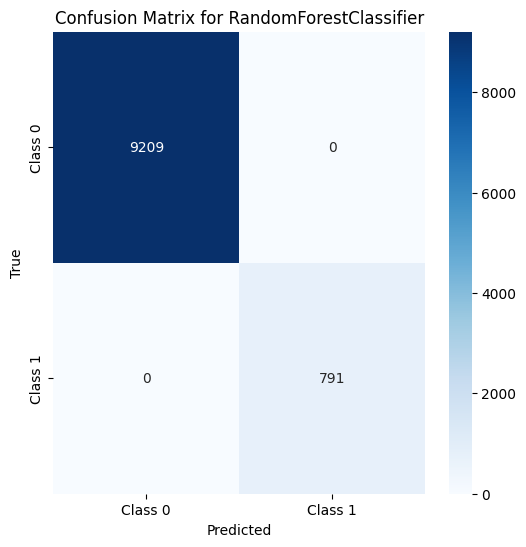

Model: GradientBoostingClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


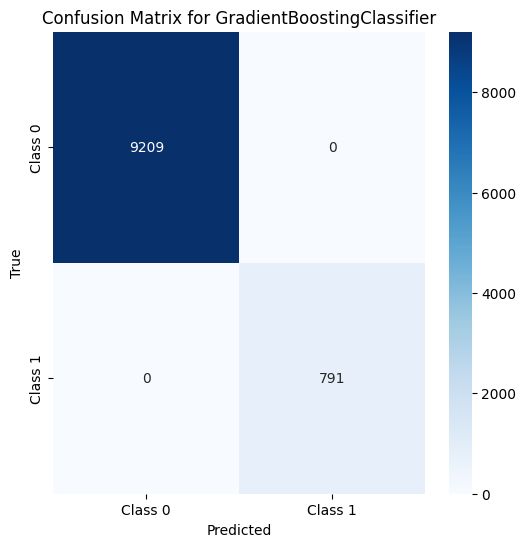

Model: SVC
Accuracy: 0.9998
Precision: 0.9975
Recall: 1.0000
F1 Score: 0.9987


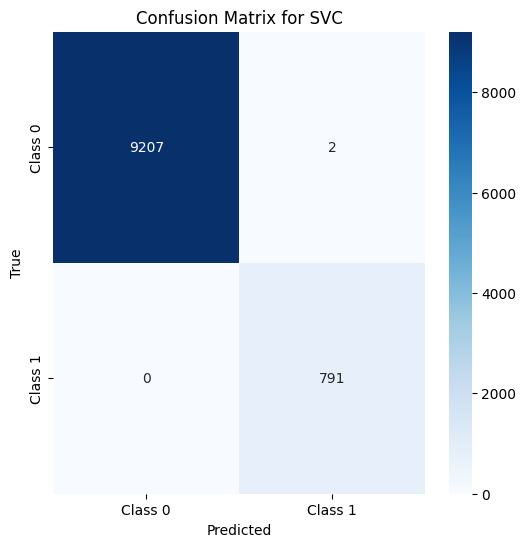

Model: MLPClassifier
Accuracy: 0.9997
Precision: 0.9987
Recall: 0.9975
F1 Score: 0.9981
ROC AUC: 1.0000


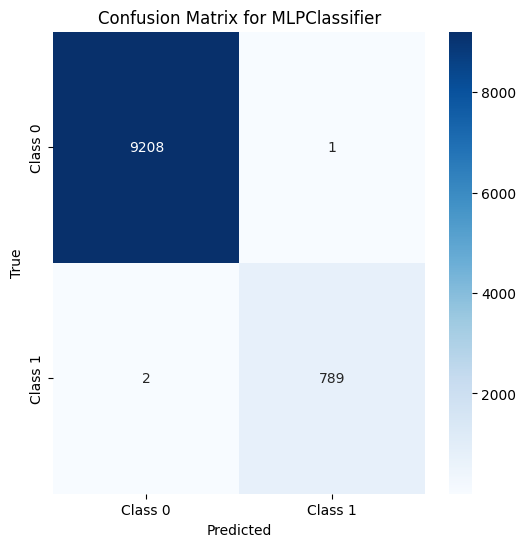

Model: KNeighborsClassifier
Accuracy: 0.9994
Precision: 0.9975
Recall: 0.9949
F1 Score: 0.9962
ROC AUC: 0.9987


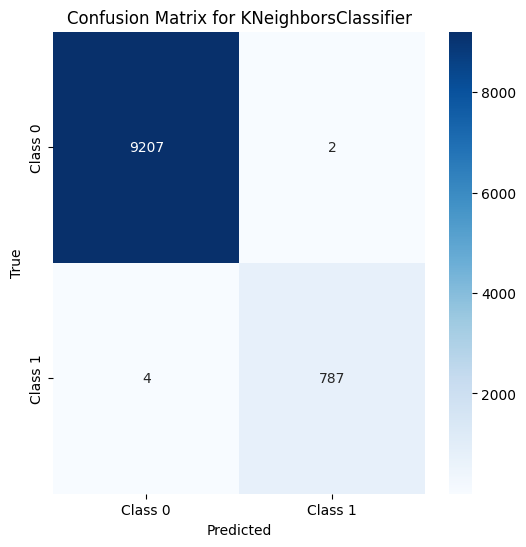

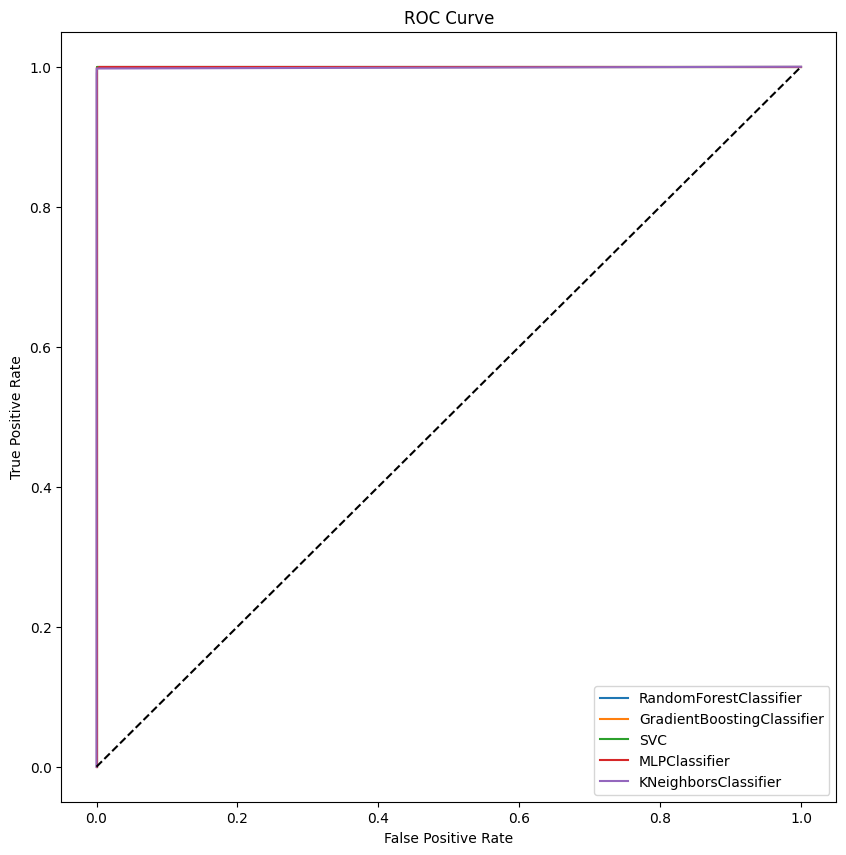

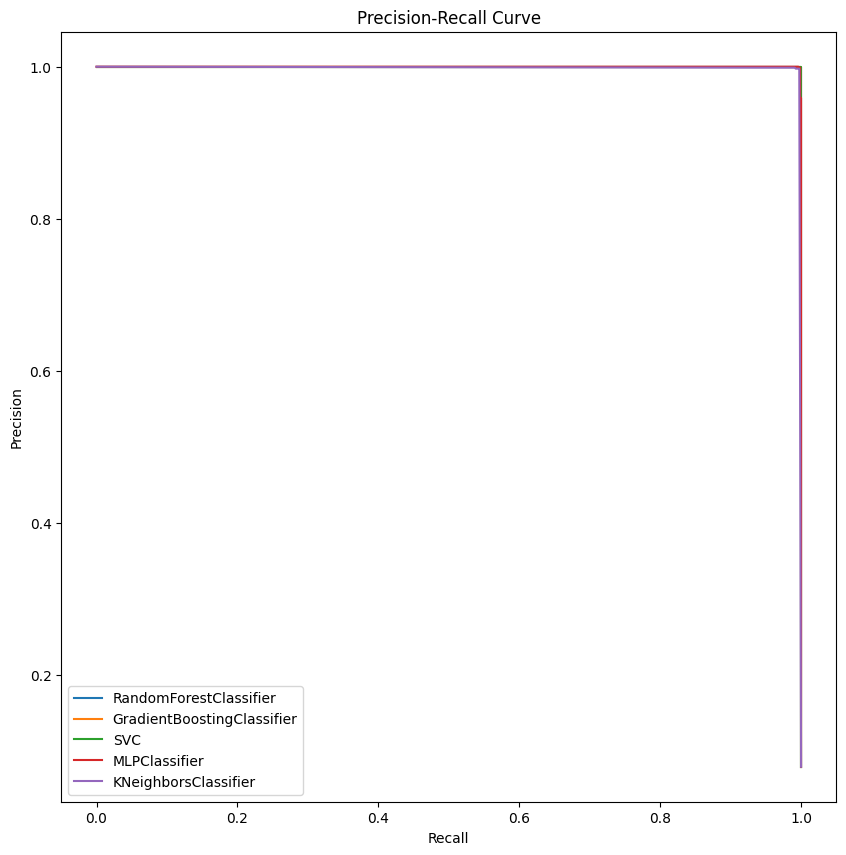

In [ ]:
# Models evaluation and comparison in a plot
models = [rf, gb, svm, mlp, knn]
for model in models:
    evaluate_model(model, X_test_scaled, y_test)

# ROC curve
plt.figure(figsize=(10, 10))
for model in models:
    if(model != svm):
        y_pred = model.predict_proba(X_test_scaled)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=model.__class__.__name__)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall curve
plt.figure(figsize=(10, 10))
for model in models:
    if(model != svm):
        y_pred = model.predict_proba(X_test_scaled)[:,1]
        
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=model.__class__.__name__)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
